# Лабороторная работа №2

1. Решить задачу в соответствии с номером варианта. Для решения реализовать
алгоритмы одномерной минимизации Функции без производной: метод
дихотомии, метод золотого сечения, метод Фиббоначи, метод парабол и
комбинированный метод Брента.

2. Сравните методы по количеству итераций и количеству вычислений функции в
зависимости от разной точности. Для каждого метода обязательно у
как изменяется отрезок при переходе к следующей итерации.

3. Протестировать реализованные алгоритмы для задач минимизации многомодальных функций, например, на различных полиномах. Могут ли метод золотого сечения/Брента не найти локальный минимум многомодальной функции?

4. По результатам выполнения лабораторной работы необходимо подготовить
отчет. Отчет должен содержать описание реализованных вами алгоритмов,
ссылку на реализациюю, необходимые тесты и таблицы. 

5. Для защиты лабораторной рабоыт необходимо знать описание методов на
языке математики, пояснять полученные результаты, а также уметь обосновать
разумность примененных Вами методов для данных функций.

# Вариант 9

Пожилая пара математиков вышла на пенсию и решила поехать в отпуск в тропики.
Однако годы, проведенные друг с другом и цифрами, дают о себе знать. Чтобы
понять, в какое время года лучше всего ехать и не попасть в сезон дождей, они
решили исследовать климатические условия в месте своего отдыха. В интернете они нашли кривую, показывающую среднее количество осадков в течение года:

$$\Large y(x) = e^{sin(x)*ln(x)} $$

В какой момент (на относительной шкале времени) пожилой паре лучше всего
быть в отпуске?

![image](https://github.com/FedosCucumber/AppliedMaths/blob/main/Lab2/Harold%20thinking.jpeg?raw=true)

Очевидно, что рассматриваемая функция на промежутке $ [a,b] $ достигает минимума в такой точке $ c $, что $$ c = \max x : (sin(x) = -1) \land (x \in [a, b] )$$
Для упрощения задачи предположим, что наша пара пенсинеров хочет поехать в отпуск в начале года.  

## Метод дихотомии

Оптимизация методом дихотомии похоже на поиск корней методом бисекции. 

$$ f(x) : [a, b] \rightarrow R, f(x) \in C([a, b]) $$

Допустим, мы хотим вычислить минимум с точность $ \epsilon = 0.001 $. Тогда на каждой итерации находим точки:
$$ \Large x_1 = {{a+b} \over 2} - \delta $$
$$ \Large x_2 = {{a+b} \over 2} + \delta $$
Где $ \delta \in (0, {\epsilon \over 2})$.  Пусть $ \delta = { \epsilon \over 5 }$

Далее вычислим значение $ f(x) $ в полученных точках и отбросим часть рассматриваемого отрезка по следующим правилам:

* Если $ f(x_1) > f(x_2) $, то берется отрезок $ [x_1, b] $, а отрезок $ [a, x_1] $ отбрасывается
* Иначе берется зеркальный относительно середины отрезок $[a, x_2]$, а $[x_2, b]$ отбрасывается.

Процедура повторяется, пока не будет достигнута заданная точность.



In [33]:
# Метод дихотомии (метод половинного деления)
def dichotomy(a, b, eps):
    iterations = 0
    func_evals = 0
    delta = eps / 5

    while abs(b - a) > eps:
        iterations += 1
        func_evals += 2
        mid = (a + b) / 2
        x1 = mid - delta
        x2 = mid + delta
        
        if y(x1) < y(x2):
            b = x2
        else:
            a = x1

    return (a + b) / 2, iterations, func_evals

## Метод золотого сечения 

На каждой итерации метода дихотомии приходится вычислять новые точки. Можно добиться того, чтобы на очередной итерации было необходимо высчитывать лишь одну новую точку, что заметно способствовало бы оптимизации процедуры. Это достигается путём зеркального деления отрезка в золотом сечении, в этом смысле метод золотого сечения можно рассматривать, как улучшение метода дихотомии с параметром:
$\delta = (b-a)({1 \over \Phi}-{1 \over 2})$, 
где $\Phi = {{{\sqrt 5}+1} \over 2}$. - золотое сечение

Тогда для того, чтобы найти неопределённое значение этой функции на заданном отрезке, отвечающее критерию поиска (пусть это будет минимум), рассматриваемый отрезок делится в пропорции золотого сечения в обоих направлениях, то есть выбираются две точки $x_1$ и $x_2$ такие, что:
$$ \Large {b-a \over b-x_1}={b-a \over x_2 - a} = \Phi$$

Таким образом:

$$ \Large x_1 = b - {(b-a) \over \Phi }$$
$$ \Large x_2 = a + {(b-a) \over \Phi }$$

Дальнейшие шаги алгоритма такие же, как и в алгоритме дихотомии. 

* Если $f(x_1) >= f(x_2)$ то оставляем отрезок $[x_1,b]$
* Иначе оставляем отрезок $[a, x_2]$

In [111]:
# Метод золотого сечения
def golden_section(a, b, eps):
    phi = (1 + math.sqrt(5)) / 2
    iterations = 0
    func_evals = 0

    x1 = b - (b - a) / phi
    x2 = a + (b - a) / phi
    y1 = y(x1)
    y2 = y(x2)
    func_evals += 2

    while abs(b - a) > eps:
        iterations += 1
        if y1 < y2:
            b = x2
            x2 = x1
            y2 = y1
            x1 = b - (b - a) / phi
            y1 = y(x1)
            func_evals += 1
        else:
            a = x1
            x1 = x2
            y1 = y2
            x2 = a + (b - a) / phi
            y2 = y(x2)
            func_evals += 1

    return (a + b) / 2, iterations, func_evals

## Метод чисел Фибоначчи

В силу того, что в асимптотике $ \Phi = \lim_{n → ∞ } {F_{n+1} \over F_n}$, метод золотого сечения может быть трансформирован в так называемый метод чисел Фибоначчи. Однако при этом в силу свойств чисел Фибоначчи количество итераций строго ограничено. Это удобно, если сразу задано количество возможных обращений к функции.

Точки $x_1$ и $x_2$ задаются следующим образом:
$$ \Large x_1=a+(b-a)*{F_{n-2} \over F_n} $$
$$ \Large x_2=a+(b-a)*{F_{n-1} \over F_n} $$



Рассматриваемый отрезок изменяется следующим образом:
Находим значение целовой функции в этих точках: $y_1=f(x_1), y_2=f(x_2) $
* Если $ y_1 > y_2 $, то $ a = x_1, x1 = x_2, x_2=b-(x_1-a), y_1=y_2, y_2=f(x_2) $
* Иначе $ b=x_2, x_2=x_1, x_1=a+(b-x_2), y_2=y_1, y_1=f(x_1) $

Если $ n = 1 $, то $ x = {x_1 + x_2 \over 2} $ и остановка, иначе переход к следующей итерации. 

Треубемое число итераций нужно подобрать таким, что n-ое число фибоначи будет равно или меьше $ (b - a) \over \epsilon $

In [34]:
# Метод Фибоначчи
def fibonacci(a, b, eps):
    def find_n_fib(eps, a, b):
        n = 1
        while (b - a) / eps >= fib(n):
            n += 1
        return n

    def fib(n):
        return int(((1 + math.sqrt(5))**n - (1 - math.sqrt(5))**n) / (2**n * math.sqrt(5)))

    n = find_n_fib(eps, a, b)
    iterations = 0
    func_evals = 0

    x1 = a + fib(n - 2) / fib(n) * (b - a)
    x2 = a + fib(n - 1) / fib(n) * (b - a)
    y1 = y(x1)
    y2 = y(x2)
    func_evals += 2

    for i in range(n - 2):
        iterations += 1
        if y1 < y2:
            b = x2
            x2 = x1
            y2 = y1
            x1 = a + fib(n - i - 3) / fib(n - i - 1) * (b - a)
            y1 = y(x1)
            func_evals += 1
        else:
            a = x1
            x1 = x2
            y1 = y2
            x2 = a + fib(n - i - 2) / fib(n - i - 1) * (b - a)
            y2 = y(x2)
            func_evals += 1

    return (a + b) / 2, iterations, func_evals

## Метод парабол

Предполагается, что вычисление целевой функции - дорогостоящая операция. В методе парабол предлагается апроксимировать оптимизируемую функцию $f(x)$ с помощью квадратичной функции
$$ \Large p(x)=ax^2 + bx + c $$
Пусть имеются три точки $x_1 < x_2 < x_3$ такие, что интервал $[x_1, x_3]$ содержит точку минимума функции $f$. Тогда коэффициенты аппроксимирующей параболы $a,b,c$ могут быть найдены путем решения системы линейных уравнений:
$$ \Large ax^2_i+bx_i + c = f_i = f(x_i), i=1, 2, 3$$

Минимум такой параболы равен
$$ \Large u = -{b \over 2a} = x_2 - {(x_2-x_1)^2(f_2-f_3)-(x_2-x_3)^2(f_2-f_1) \over 2[(x_2-x_1)(f_2-f_3)-(x_2-x_)(f_2-f_1)]} $$

Если $f_2 < f_1$ и $f_2 < f_3$, то точка $u$ гарантированно попадает в интервал $[x_1,x_3]$. Таким образом, внутри интервала $[x_1,x_3]$ определены две точки $x_2$ и $$, с помощью сравнения значений функции $f$ в которых можно сократить интервал поиска.

* Если $u < x_2$, то
  * Если $f(u) >= f_2$, то $x_1=u, f_1=f(u)$
  * Иначе $x_3=x_2, f_3=f_2, x_2=u, f_2=f(u)$
* Иначе
  * Если $ f(u) >= f_2$, то $x_3 = u, f_3 = f(u)$
  * Иначе $ x1 = x2, f_1 = f_2, x_2 = u, f_2 =f(u)$

In [62]:
def paraboll(a, b, epsilon):
    iterations=1
    x1 = a
    x2 = (a + b) / 2
    x3 = b
    func_evals = 3
    y1 = y(x1)
    y2 = y(x2)
    y3 = y(x3)
    yU = 0
    u = 0
    while x3 - x1 > epsilon:
        iterations += 1
        z1 = (x2 - x1) ** 2 * (y2 - y3) - (x2 - x3) ** 2 * (y2 - y1)
        z2 = 2 * ((x2 - x1) * (y2 - y3) - (x2 - x3) * (y2 - y1))

        u = x2 - z1 / z2

        yU = y(u)
        func_evals = func_evals + 1
        if u < x2:
            if yU >= y2:
                x1 = u
                y1 = yU
            else:
                x3 = x2
                y3 = y2
                x2 = u
                y2 = yU
        else:
            if yU >= y2:
                x3 = u
                y3 = yU
            else:
                x1 = x2
                y1 = y2
                x2 = u
                y2 = yU
    return u, iterations, func_evals

## Метод брента

Метод   является комбинацией метода параболл и метода числе Фибоначчи. В данном методе на каждой итерации отслеживаются значения в шести точках (не обязательно различных): $a, c, x, w, v, u$. Точки $a, c$ задают текущий интер-
вал поиска решения. $x$ -— точка, соответствующая наименьшему значению функции, $w$ - — точка, соответветствующая второму снизу значению функции, $v$ - предыдущее значение $w$.  В отличие от метода парабол, в методе Брента аппроксимирующая парабола строится с помощью трех наилучших точек $x,w,v$ (в случае, если эти три точки различны и значения в них также различны). При этом минимум аппроксимирующей параболы и принимается в качестве следующей точки оптимизационного процесса, если:

* $u$ попадает внутрь интервала $[a, c]$ и отстоит от границ интервала не менее, чем на $\epsilon$
* $u$ отсоит от точки $x$ не более, чем на половину от длины предпредыщего шага. 

Если точка $u$ отвергается, то следующая точка находится в с помощью золотого сечения большего из интервалов $[a, x]$ и $[x,c]$


In [85]:
def brent(a, c, eps):
    phi = (3 - math.sqrt(5)) / 2
    x = w = v = a + phi * (c-a)
    func_evals = 1
    fx = fw = fv = y(x)
    d = e = c - a
    u = 0
    k = 1

    while c - a > eps:

        k += 1
        g, e = e, d

        if len({x, w, v}) == 3 and len({fx, fw, fv}) == 3:

            func1 = fx
            func2 = fv
            func3 = fw

            z1 = (v - x) ** 2 * (fv - fw) - (v - w) ** 2 * (fv - fx)
            z2 = 2 * ((v - x) * (fv - fw) - (v - w) * (fv - fx))

            u_t = v - z1 / z2

            if a + eps <= u <= c - eps and abs(u - x) < g / 2:
              u=u_t
              d = abs(u - x)
      
        else:
            if x < (c - a) / 2:
                u = x + phi * (c - x)
                d = c - x
            else:
                u = x - phi * (x - a)
                d = x - a

        if abs(u - x) < eps:
            u = x + (u - x) * eps
            return u, k, func_evals

        fu = y(u)

        func_evals = func_evals + 1
        if fu <= fx:
            if u >= x:
                a = x
            else:
                c = x
            v, w, x = w, x, u
            fv, fw, fx = fw, fx, fu
        else:
            if u >= x:
                c = u
            else:
                a = u
            if fu <= fw or w == x:
                v, w = w, u
                fv, fw = fw, fu
            elif fu <= fv or v == x or v == w:
                v = u
                fv = fu
    return u, k, func_evals;

In [138]:
import matplotlib.pyplot as plt

def graph(x, y, method, what):
    plt.figure(figsize=(9, 9))
    plt.subplot(2, 1, 1)
    plt.plot(
        ["10ˆ(-1)", "10ˆ(-2)", "10ˆ(-3)", "10ˆ(-4)", "10ˆ(-5)", "10ˆ(-6)", "10ˆ(-7)", "10ˆ(-8)"],
        y)
    plt.title(f"{method}: {what}(epsilon)")
    plt.xlabel("epsilon", fontsize=14)
    plt.ylabel("f_invocations", fontsize=14)
    plt.grid(True)
    plt.show()

Presicion:  0.1
dichotomy: x_min=4.82984375, iterations=7, func_evals=14
golden_section: x_min=4.845971347493901, iterations=8, func_evals=10
fibonacci: x_min=4.8545454545454545, iterations=8, func_evals=10
paraboll: x_min=4.842558335059404, iterations=11, func_evals=13
brent: x_min=4.519349550499538, iterations=5, func_evals=4

Presicion:  0.01
dichotomy: x_min=4.841955078125, iterations=10, func_evals=20
golden_section: x_min=4.844505072622187, iterations=13, func_evals=15
fibonacci: x_min=4.845901639344262, iterations=13, func_evals=15
paraboll: x_min=4.842558335059404, iterations=11, func_evals=13
brent: x_min=4.527816595348835, iterations=11, func_evals=10

Presicion:  0.001
dichotomy: x_min=4.842545043945313, iterations=13, func_evals=26
golden_section: x_min=4.842560443284343, iterations=18, func_evals=20
fibonacci: x_min=4.843099736905046, iterations=17, func_evals=19
paraboll: x_min=4.842558335059404, iterations=11, func_evals=13
brent: x_min=4.527863352719334, iterations=15, 

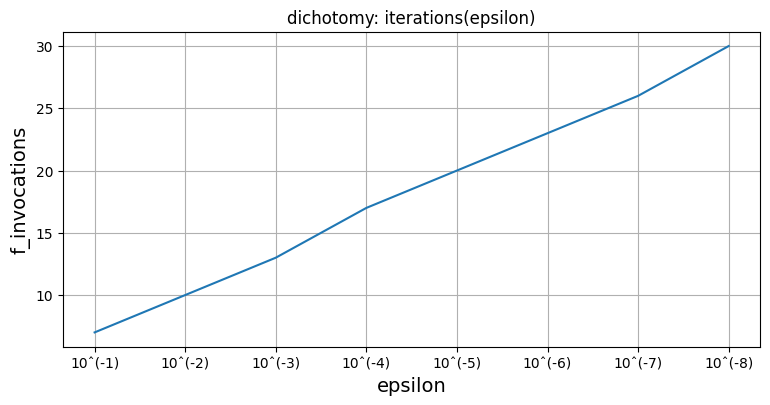

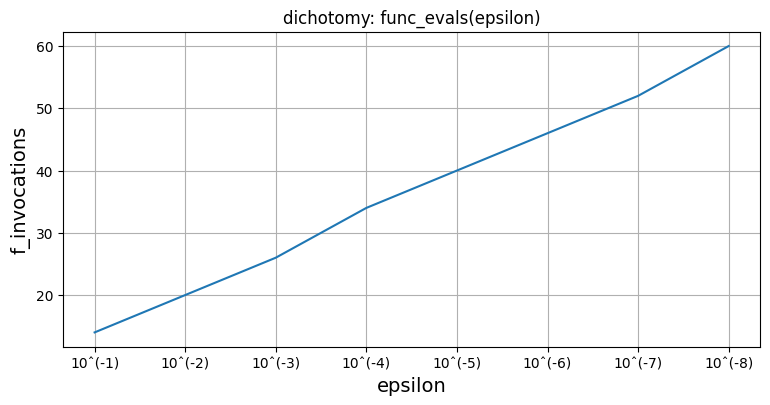

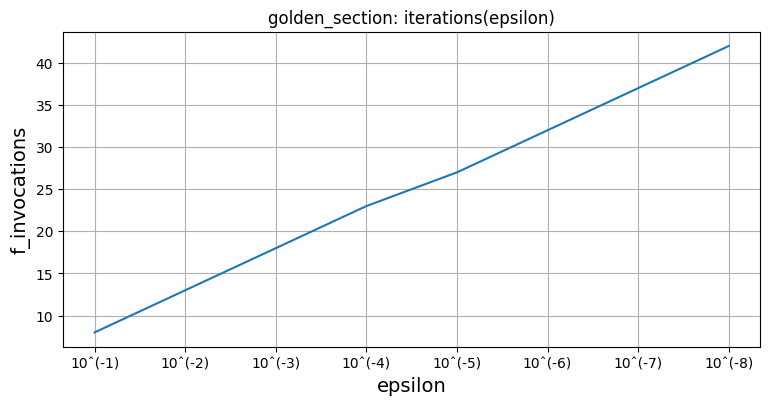

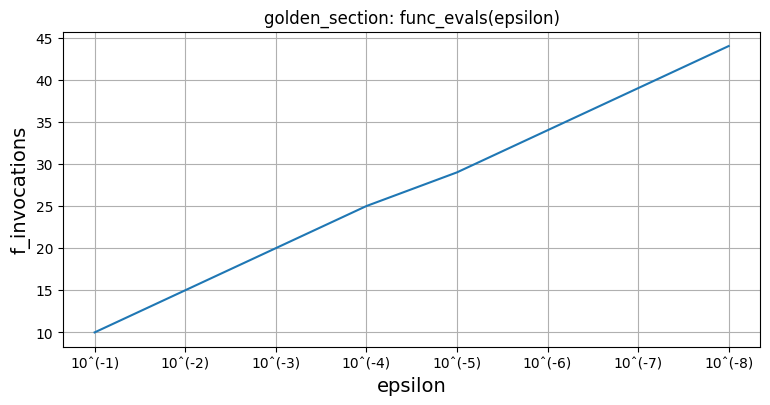

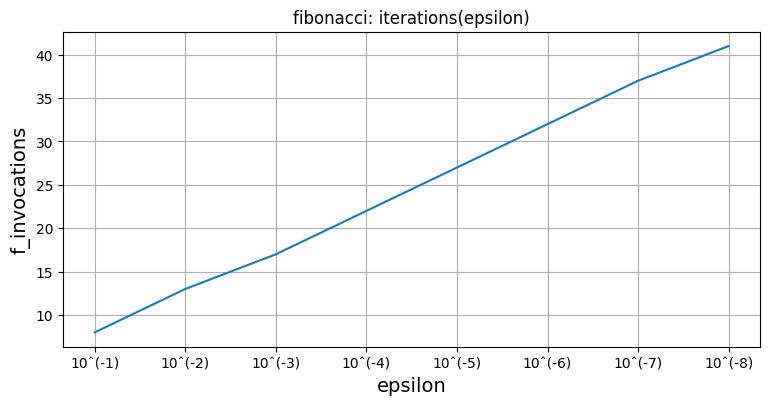

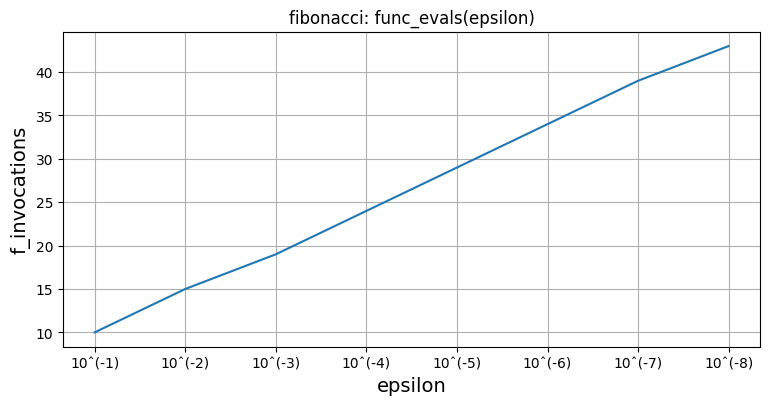

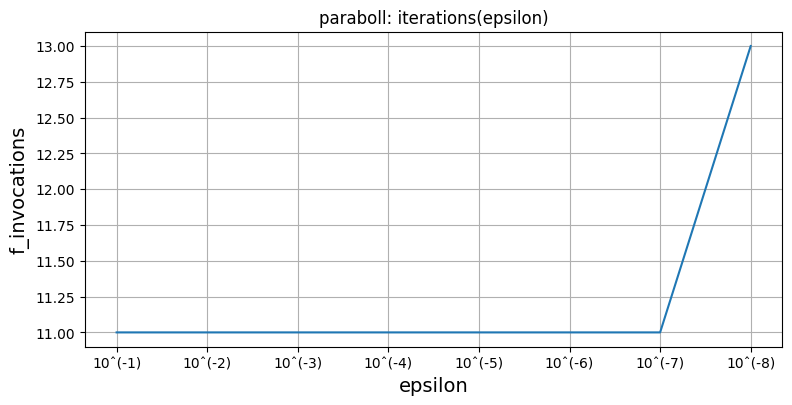

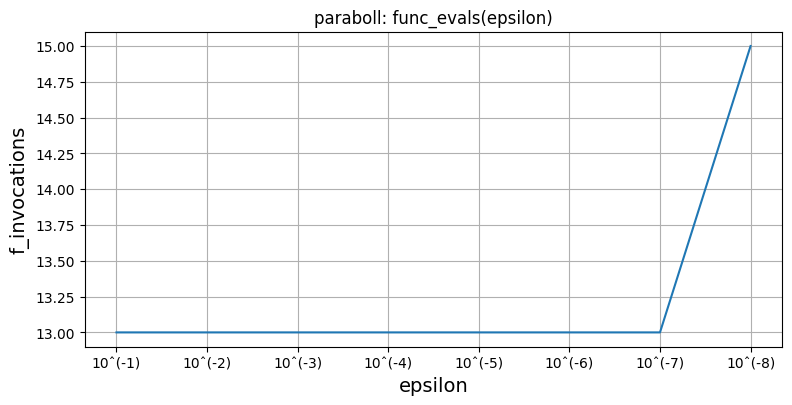

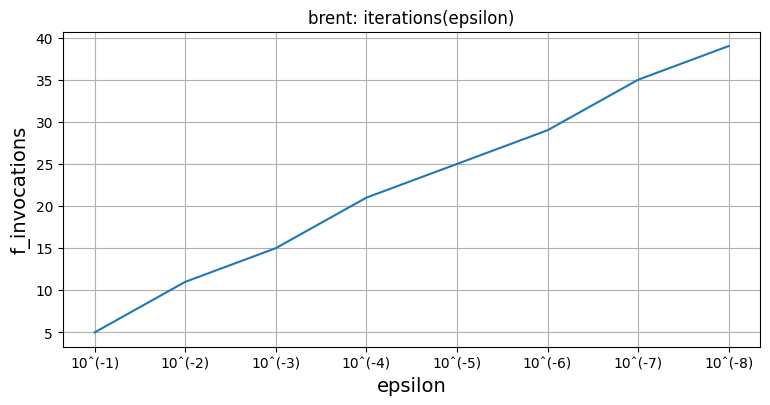

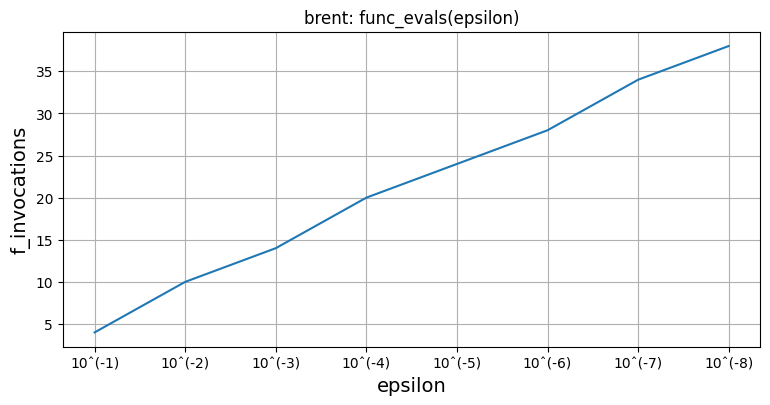

In [140]:

import numpy as np
import math

# Функция
def y(x):
    return math.exp(math.sin(x) * math.log(x + 1e-10, math.e))


# Тестирование алгоритмов
def main():

    a, b = 3, 7
    methods = [dichotomy, golden_section, fibonacci, paraboll, brent]
    d_iterations = {}
    d_evals = {}
    for method in methods:
      d_iterations[method.__name__]=[]
      d_evals[method.__name__]=[]

    for i in range(1, 9):
      eps = 10 ** -i
      print("Presicion: ", eps)

      for method in methods:
        x_min, iterations, func_evals = method(a, b, eps)
        result = (method.__name__, x_min, iterations, func_evals)
        d_iterations[method.__name__].append(result[2])
        d_evals[method.__name__].append(result[3])
        print(f"{result[0]}: x_min={result[1]}, iterations={result[2]}, func_evals={result[3]}")
      print()


    for key in d_iterations:
      graph([10 ** (-i) in range(1, 9)], d_iterations[key], key, "iterations")
      graph([10 ** (-i) in range(1, 9)], d_evals[key], key, "func_evals")


if __name__ == "__main__":
    main()